#T1 - Simple graph

In [12]:
##simple graph
from typing import Dict,TypedDict
from langgraph.graph import StateGraph
##building agentstate

class AgentState(TypedDict): ##state schema
    message: str


def greeting_node(state: AgentState) -> AgentState:
    """Simple node that adds a greeting message to the state"""
    state['message'] = "Hey " + state["message"] + " how is your day going?"
    return state


In [13]:
##build a graph
graph=StateGraph(AgentState)
graph.add_node("greeter", greeting_node)

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app=graph.compile()

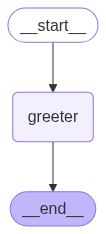

In [14]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [15]:
result=app.invoke({"message":"Chai"})

result["message"]

'Hey Chai how is your day going?'

In [16]:
####exercise: compliment agent

class AgentState(TypedDict):
    message: str

def compliment_node(state: AgentState) -> AgentState:
    """Simple node tht gives compliments"""
    state["message"] = state["message"] + ", you look fantastic"
    return state


g1=StateGraph(AgentState)
g1.add_node("comp",compliment_node)
g1.set_entry_point("comp")
g1.set_finish_point("comp")
app=g1.compile()

res=app.invoke({"message":"bob"})
res["message"]


'bob, you look fantastic'

#T2- handling multiple inputs

In [4]:
###how to handle multiple inputs
from typing import List,TypedDict
from langgraph.graph import StateGraph

In [5]:
class AgentState(TypedDict): ##state scehma
    values: List[int]
    name: str
    result: str

def process_values(state: AgentState) -> AgentState: 
    """This functions handles multiple different inputs"""

    state["result"] = f"Hi there {state["name"]}, your sum = {sum(state["values"])}"
    return state



In [7]:
graph=StateGraph(AgentState)
graph.add_node("processor",process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app=graph.compile()


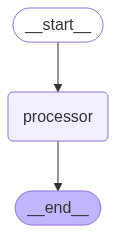

In [8]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
ans=app.invoke({"values":[1,2,3,4],"name":"Steve"})
print(ans)

{'values': [1, 2, 3, 4], 'name': 'Steve', 'result': 'Hi there Steve, your sum = 10'}


In [11]:
ans["result"]

'Hi there Steve, your sum = 10'

In [16]:
####exercise
from typing import TypedDict, List
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    name: str
    values: list
    op: str
    result: str


def worker(state: AgentState) ->AgentState:
    if state["op"]=="+":
        state["result"] = "Hey "+ state["name"]+f", your res is {sum(state['values'])}"
    
    else:
        temp=1
        for i in state["values"]:
            temp*=i
        state["result"] = "Hey "+ state["name"]+f", your res is {temp}"

    return state


graph=StateGraph(AgentState)
graph.add_node("worker",worker)
graph.set_entry_point("worker")
graph.set_finish_point("worker")
app=graph.compile()

r1=app.invoke({"name":"bob","values":[1,2,3,4],"op":"+"})
print(r1["result"])
r2=app.invoke({"name":"bob","values":[1,2,3,4],"op":"*"})
print(r2["result"])


Hey bob, your res is 10
Hey bob, your res is 24


#T3 - Sequential graph : multiple nodes

In [22]:
###how to handle multiple state
from typing import List,TypedDict
from langgraph.graph import StateGraph

In [23]:
class AgentState(TypedDict):
    name: str
    age: str
    final:str



In [24]:
def first_node(state:AgentState)->AgentState:
    """"This is the first node of the sequence"""
    state["final"]=f"Hi {state["name"]}"
    return state

def second_node(state:AgentState)->AgentState:
    """"This is the second node of the sequence"""
    state["final"]=state["final"]+f" You are {state["age"]} years old"
    return state

In [30]:
graph=StateGraph(AgentState)
graph.add_node("first_node",first_node)
graph.add_node("second_node",second_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node","second_node")
graph.set_finish_point("second_node")

app=graph.compile()

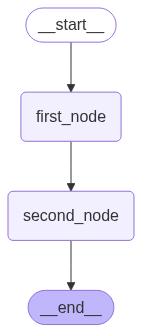

In [31]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [33]:
res=app.invoke({"name":"Charlie","age":"20"})
res["final"]

'Hi Charlie You are 20 years old'

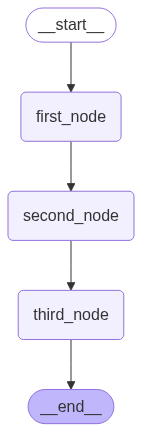

Hi Charlie your age is 20 and you skills are:Python Java C++ 


In [34]:
####exercise3 triple nodes
from typing import List,TypedDict
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    name: str
    age: int
    skills: list
    res: str

def first_node(state:AgentState)->AgentState:
    """"this is the first node which gives a greeting"""
    state["res"] = f"Hi {state["name"]}"
    return state

def second_node(state:AgentState)->AgentState:
    """This tells about users age"""
    state["res"] = state["res"] + f" your age is {state['age']}"
    return state

def third_node(state:AgentState)->AgentState:
    """This lists all the skills"""
    state["res"] = state["res"] + f" and you skills are:"
    for n in state["skills"]:
        state["res"] += n + " "

    return state


graph=StateGraph(AgentState)
graph.add_node("first_node",first_node)
graph.add_node("second_node",second_node)
graph.add_node("third_node",third_node)
graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("third_node")
app=graph.compile()
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))
res=app.invoke({"name":"Charlie","age":20,"skills":["Python","Java","C++"]})
print(res["res"])

#T4 - Conditional graph

In [35]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [36]:
class AgentState(TypedDict):
    number1: int
    number2: int
    op: str
    final: int
    

In [37]:
def adder(state:AgentState)->AgentState:
    """" this adds 2 numbers"""
    state["final"]=state["number1"]+state["number2"]
    return state

def subtractor(state:AgentState)->AgentState:
    """This subtracts 2 numbers"""
    state["final"]=state["number1"]-state["number2"]
    return state

def decide_next_node(state:AgentState)->str:
    """This node decides which operation to perform"""
    if state["op"]=='+':
        return "addition_operation"
    elif state["op"]=="-":
        return "sub_operation"
    


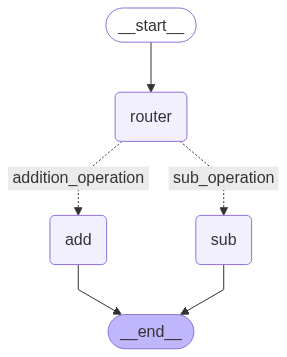

In [40]:
graph=StateGraph(AgentState)
graph.add_node("add",adder)
graph.add_node("sub",subtractor)
graph.add_node("router",lambda state:state) ##passthrough function

graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {   #edge:node
        "addition_operation":"add",
        "sub_operation":"sub"
    })

graph.add_edge("add",END)
graph.add_edge("sub",END)

app=graph.compile()
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


In [41]:
res1=app.invoke({"number1":2,"number2":3,"op":"+"})
print(res1)

{'number1': 2, 'number2': 3, 'op': '+', 'final': 5}


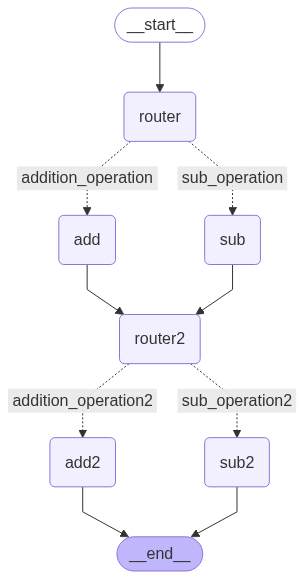

-1


In [ ]:
####exercise4 - double of above graph
class AgentState(TypedDict):
    n1: int
    n2: int
    n3: int
    n4: int
    op1: str
    op2: str
    final: int

def adder(state:AgentState)->AgentState:
    """this function adds 2 numbers"""
    state["final"] = state["n1"] + state["n2"]
    return state    

def adder2(state:AgentState)->AgentState:
    """this function adds 2 numbers"""
    state["final"] = state["n3"] + state["n4"]
    return state

def subtractor(state:AgentState)->AgentState:
    """this function subtracts 2 numbers"""
    state["final"] = state["n1"] - state["n2"]
    return state 

def subtractor2(state:AgentState)->AgentState:
    """this function subtracts 2 numbers"""
    state["final"] = state["n3"] - state["n4"]
    return state   

def decide_next_node(state:AgentState)->str:
    """This function decides which operation to perform"""
    if state["op1"] == "+":
        return "addition_operation"
    elif state["op1"] == "-":
        return "sub_operation"

def decide_next_node2(state:AgentState)->str:
    """This function decides which operation to perform"""
    if state["op2"] == "+":
        return "addition_operation2"
    elif state["op2"] == "-":
        return "sub_operation2"
    

graph = StateGraph(AgentState)
graph.add_node("add", adder)   
graph.add_node("add2", adder2)
graph.add_node("sub", subtractor)
graph.add_node("sub2", subtractor2)
graph.add_node("router", lambda state: state)  # passthrough function
graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {   # edge:node
        "addition_operation": "add",
        "sub_operation": "sub"
    }
)
graph.add_edge("add", "router2")
graph.add_edge("sub", "router2")
graph.add_node("router2", lambda state: state)  # passthrough function
graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {   # edge:node
        "addition_operation2": "add2",
        "sub_operation2": "sub2"
    }
)
graph.add_edge("add2", END)
graph.add_edge("sub2", END)
app = graph.compile()
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))
res1 = app.invoke({"n1": 2, "n2": 3, "n3": 4, "n4": 5, "op1": "+", "op2": "-"})
print(res1["final"])  
    


#T5 - Looping graph

In [ ]:
from typing import TypedDict,List
from langgraph.graph import StateGraph,START,END
import random

In [46]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int
    

In [47]:
def greeting_node(state: AgentState)->AgentState:
    """greets hi to person"""
    state["name"] = f"Hi there, {state["name"]}"
    state["counter"] = 0
    return state

def random_node(state:AgentState)->AgentState:
    """Generates a random no from 0 to 10"""
    state["number"].append(random.randint(0,10))
    state["counter"]+=1
    return state

def shld_continue(state:AgentState)->AgentState:
    """Function to decide what to do next"""
    if state["counter"]<5:
        print("Entering loop",state["counter"])
        return "loop" ##conditional edge
    else:
        return "end" ##conditional edge
    

In [48]:
#greeting ->random->random->random->random->random->END

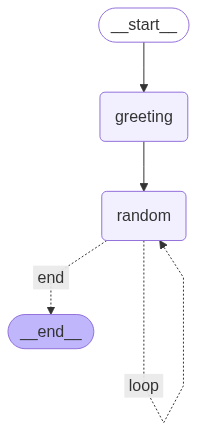

Entering loop 1
Entering loop 2
Entering loop 3
Entering loop 4


In [50]:
graph=StateGraph(AgentState)
graph.add_node("greeting",greeting_node)
graph.add_node("random",random_node)
graph.add_edge("greeting","random")

graph.add_conditional_edges(
    "random",
    shld_continue,
    {
        "loop":"random", ##self loop
        "end":END ##terminating condition
    }
)

graph.add_edge(START,"greeting")
app=graph.compile()
from IPython.display import Image, display  
display(Image(app.get_graph().draw_mermaid_png()))
result = app.invoke({"name": "Alice", "number": []})

In [52]:
result

{'name': 'Hi there, Alice', 'number': [9, 9, 7, 4, 5], 'counter': 5}

In [53]:
####exercise5 - higher or lower game
from typing import TypedDict, List
import random
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    player_name: str
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    secret_number: int
    hint: str
    game_over: bool

def setup_game(state: AgentState) -> AgentState:
    """Sets up the game by initializing the secret number."""
    state["secret_number"] = random.randint(state["lower_bound"], state["upper_bound"])
    state["attempts"] = 0
    state["guesses"] = []
    state["game_over"] = False
    state["hint"] = ""
    print("Setting up the game. Secret number generated.")
    return state

def guess_number(state: AgentState) -> AgentState:
    """Guesses a number within the current bounds."""
    guess = (state["lower_bound"] + state["upper_bound"]) // 2
    state["guesses"].append(guess)
    state["attempts"] += 1
    print(f"Attempt {state['attempts']}: Guessing {guess}")
    return state

def check_guess(state: AgentState) -> AgentState:
    """Checks the guess and provides a hint."""
    guess = state["guesses"][-1]
    if guess == state["secret_number"]:
        state["hint"] = f"Correct! The number was {state['secret_number']}."
        state["game_over"] = True
    elif guess < state["secret_number"]:
        state["hint"] = "Higher"
        state["lower_bound"] = guess + 1
    else:
        state["hint"] = "Lower"
        state["upper_bound"] = guess - 1
    print(f"Hint: {state['hint']}")
    return state

def should_continue(state: AgentState) -> str:
    """Decides whether to continue guessing or end the game."""
    if state["game_over"]:
        print("Game Over: Correct guess!")
        return "end"
    elif state["attempts"] >= 7:
        state["game_over"] = True
        state["hint"] = f"You ran out of guesses. The number was {state['secret_number']}."
        print("Game Over: Max attempts reached.")
        return "end"
    else:
        return "guess"

# Define the graph
graph = StateGraph(AgentState)
graph.add_node("setup", setup_game)
graph.add_node("guess", guess_number)
graph.add_node("check", check_guess)

# Conditional edge to loop back to "guess" or end the game
graph.add_conditional_edges(
    "check",
    should_continue,
    {
        "guess": "guess",
        "end": END
    }
)

# Set up the graph connections
graph.set_entry_point("setup")
graph.add_edge("setup", "guess")
graph.add_edge("guess", "check")

# Compile the graph
app = graph.compile()

# Run the game
initial_state = {
    "player_name": "Student",
    "guesses": [],
    "attempts": 0,
    "lower_bound": 1,
    "upper_bound": 20,
    "secret_number": None,
    "hint": "",
    "game_over": False
}

result = app.invoke(initial_state)
print(result["hint"])

Setting up the game. Secret number generated.
Attempt 1: Guessing 10
Hint: Higher
Attempt 2: Guessing 15
Hint: Lower
Attempt 3: Guessing 12
Hint: Lower
Attempt 4: Guessing 11
Hint: Correct! The number was 11.
Game Over: Correct guess!
Correct! The number was 11.
